In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [19]:
salary_dataset=pd.read_csv("Salary_dataset.csv")

In [20]:
salary_dataset

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


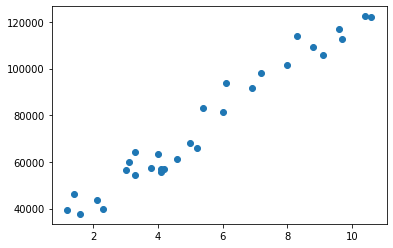

In [26]:
plt.scatter(Y,X)

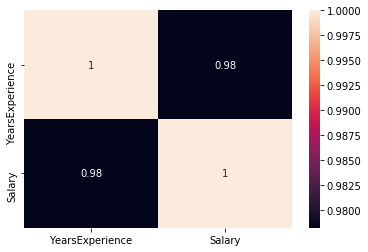

In [4]:
dff=salary_dataset[["YearsExperience","Salary"]]
sns.heatmap(dff.corr(),annot=True)

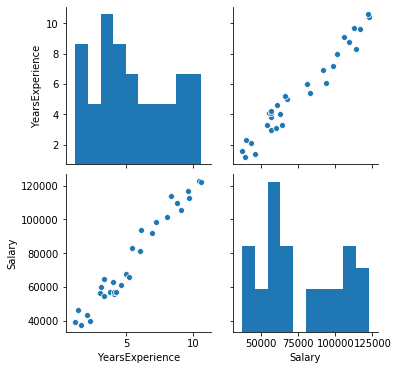

In [5]:
sns.pairplot(salary_dataset[["YearsExperience","Salary"]])

In [6]:
#creating dependent and independent variables
Y = salary_dataset.iloc[:,1:2].values
X = salary_dataset.iloc[:,2].values

In [7]:
#splitting data into testing and training


X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3)

print(f"row count of X_train" +"-"+ str(f"{len(X_train):,}"))
print(f"row count of X_test" +"-"+ str(f"{len(X_test):,}"))

print(f"row count of y_train" +"-"+ str(f"{len(y_train):,}"))
print(f"row count of y_test" +"-"+ str(f"{len(y_test):,}"))

row count of X_train-21
row count of X_test-9
row count of y_train-21
row count of y_test-9


In [8]:
X_train_sm =sm.add_constant(X_train)

In [9]:
X_train_sm

array([[1.00000e+00, 5.69580e+04],
       [1.00000e+00, 6.32190e+04],
       [1.00000e+00, 9.17390e+04],
       [1.00000e+00, 6.01510e+04],
       [1.00000e+00, 5.57950e+04],
       [1.00000e+00, 9.82740e+04],
       [1.00000e+00, 1.13813e+05],
       [1.00000e+00, 5.44460e+04],
       [1.00000e+00, 1.21873e+05],
       [1.00000e+00, 6.44460e+04],
       [1.00000e+00, 5.70820e+04],
       [1.00000e+00, 3.93440e+04],
       [1.00000e+00, 9.39410e+04],
       [1.00000e+00, 3.98920e+04],
       [1.00000e+00, 8.30890e+04],
       [1.00000e+00, 3.77320e+04],
       [1.00000e+00, 1.01303e+05],
       [1.00000e+00, 4.62060e+04],
       [1.00000e+00, 1.12636e+05],
       [1.00000e+00, 1.05583e+05],
       [1.00000e+00, 1.16970e+05]])

In [10]:
#fiting regression
ls=sm.OLS(y_train,X_train_sm).fit()

In [11]:
#printing the parameters
ls.params

array([-2.40684919e+00,  1.01607089e-04])

In [12]:
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     390.4
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           3.97e-14
Time:                        01:45:21   Log-Likelihood:                -19.918
No. Observations:                  21   AIC:                             43.84
Df Residuals:                      19   BIC:                             45.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4068      0.421     -5.723      0.000      -3.287      -1.527
x1             0.0001   5.14e-06     19.758      0.000    9.08e-05       0.000
==============================================================================
Omnibus:                        5.593   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                1.715
Skew:                          -0.167   Prob(JB):                        0.424
Kurtosis:                       1.640   Cond. No.                     2.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#regression fomular
# y = a + bx  where y id the dependable variable  , a is the intercept,   b is the slope and x is the independable variable

# salary = -2.4068 + 0.0001 * X_train

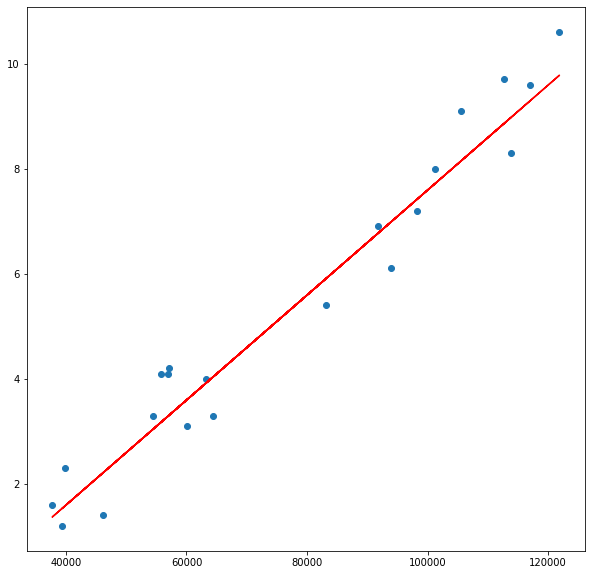

In [21]:
#plotting the regression line
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.scatter(X_train,y_train)
plt.plot(X_train, -2.4068 + 0.0001 * X_train,"r")
plt.show()

In [22]:
#now predict salary is based on yearexperince

X_test_sm = sm.add_constant(X_test)

#predicting the y values nbade on the x intercepts
y_test_pred = ls.predict(X_test_sm)

y_test_pred

array([ 2.01570098,  3.34848117,  8.71221782,  3.40406025,  5.86031003,
        3.80256326,  4.30226692, 10.0290457 ,  4.49623486])

In [23]:
#importing r2
from sklearn.metrics import r2_score

In [24]:
r_squred = r2_score(y_test,y_test_pred)

r_squred

0.9623288415521958